# Modelo de Britter Y McQuaid 


## Modelo 
Este modelo determina la distancia a favor del viento de una descarga de LNG para obtener una concentración igual a el límite inferior de inflamabilidad de 5% en volumen de concentración de vapor.





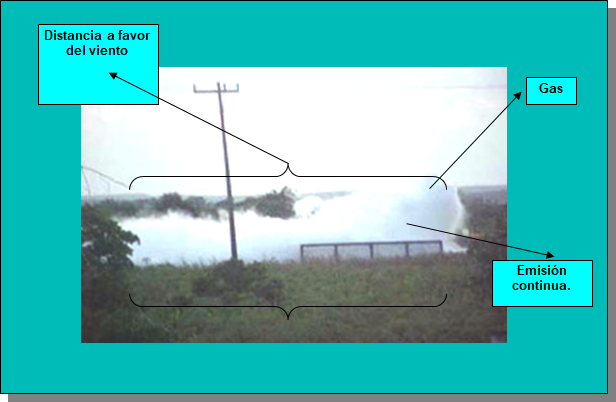

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|V|		Velocidad del derrame		|	m^3/s|
|U	|	Velocidad del viento a 10 m		|	m/s|
|Rd|		Duración del derrame		|	s|
|$\rho$|		Densidad del fluido		|	kg/m^3|
|$\rho$v|		Densidad del vapor en el pto. de eb.		|	kg/m^3|
|Tr|		Temperatura requerida		|	K|
|Ta|		Temperatura ambiente		|K|
|Pa|		Presión ambiental		|	atm|
|Co|		Concentración inicial del fluido		|	v/v|
|Cr|		Concentración requerida		|	v/v|
|g|		Aceleración de la gravedad		|	m/s^2|
|R|		Constante de los gases		|0.08206	L*atm/mol*K|
|PMa|		Peso molecular del aire		|	kg/kmol|



## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|ra	|	Densidad del aire		|kg/m^3|
|g0|		Factor de flotabilidad inicial		|m/s^2|
|Q|		Velocidad de descarga volumétrica		|m^3/s|
|Dc|			Dim. característica de la fuente (continua)|	m|
|Di|			Dim. característica de la fuente (instantánea)	|m|
|V0	|	Volumen de gas descargado.		|m^3|
|g1|		Criterio de nube densa (continua)|	|	
|g2|		Criterio de nube densa (instantánea)	||	
|Cm|		Concentración efectiva	|	v/v|
|X1|		Eje x liberación continua||		
|X2|		Eje x liberación instantánea||		
|x|		Distancia a favor del viento		|m|


### Consideraciones
-El tipo de estabilidad atmosférica tiene poco efecto que no se toma en cuenta en el modelo (Britter & McQuaid).

-Los gráficos son experimentales y aplica sólo en zonas rurales y terrenos despejados.

-La concentración inicial del fluido se considera al 100% o sea una sustancia pura.









## Desarrollo y ecuaciones

El modelo de Britter y McQuaid fue desarrollado básicamente mediante análisis dimensional y datos correlacionados ya existentes en dispersiones de nubes densas. 

El primer paso es determinar si el modelo es aplicable, para ello se determina el factor de flotabilidad inicial definida:

- Ecuación 1.  $g_0=\frac{g(\rho_0 - \rho_a) }{ \rho_a }$


Una dimensión característica de la fuente de emisión puede ser definida sólo dependiendo del tipo de liberación, para tipo continua se tiene:

- Ecuación 2.  $D_c=(\frac{Q}{U})^{1/2}$




y para tipo instantánea:

- Ecuación 3. $D_i=V_0^{1/3}$

El criterio para una nube suficientemente densa también es característica de la liberación, para continua se tiene:

- Ecuación 4. $(\frac{g_0Q}{U^3 D_c})^{1/3}\geq0.15$

similarmente para liberación instantánea tenemos:

- Ecuación 5. $\frac{(g_0V_0)^{1/2}}{U D_i}\geq0.20$

Si estos criterios son satisficidos entonces se utilizan nomogramas o ecuaciones de correlación para el tipo de  liberación. Estas se pueden ver en las siguientes gráficas:

### Gráficos de Britter & McQuaid.

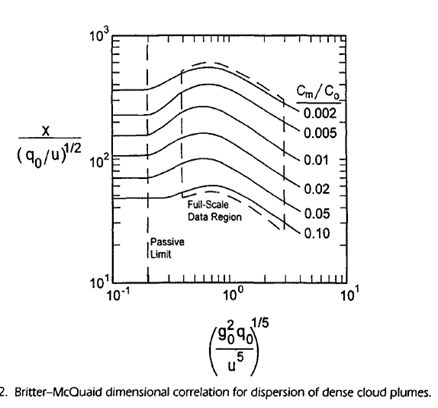

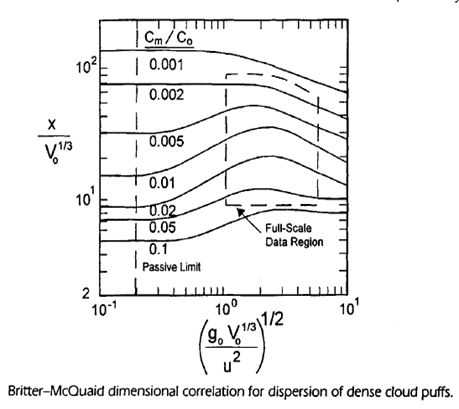

### Correlaciones de Britter & McQuaid.

#### $\alpha $   Continua
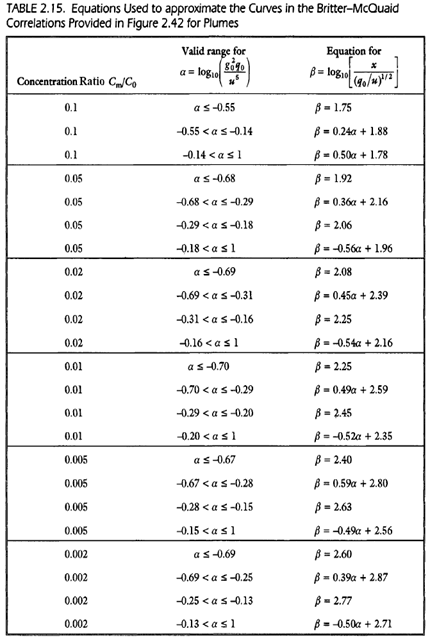

#### $\alpha $   Instantánea
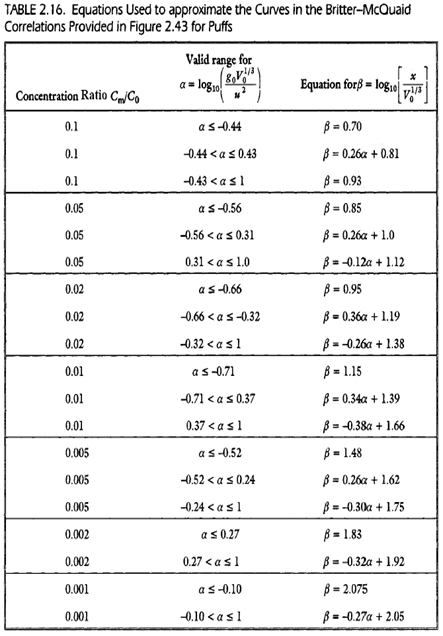

El criterio para determinar si la liberación es continua o instantánea es calculando el siguiente grupo:

- Ecuación 6. $\frac{UR_D}{x}$

Si dicho valor es mayor o igual a 2.5 entonces la liberación del gas es continua, si es menor o igual a 0.6 entonces es considerada instantánea, si el valor oscila entre ambos rangos, entonces las concentraciones son calculadas utilizando ambos modelos y la mínima concentración sería la seleccionada.

Recuerde que la variable más importante en la mayoría de los casos es "x" o sea la distancia a la cuál  se va moviendo la nube densa de gas.

## Resultados


In [1]:
#Datos
V=0.23  #m^3/s
U= 10.9  #m/s
Rd=174  #s
rho= 425.6#Kg/m^3
rho_v= 1.76#Kg/m^3
Tr=111 #K
Ta=298 #K
Pa=1 #atm
C0=1 #v/v
Cr=0.05 #v/v

#Constantes
g= 9.807 #m/s^2
R= 0.082 #L atm/mol K
PMa= 29.92 #Kg/Kgmol

Densidad del aire a las condiciones dadas

In [3]:
rho_a=(Pa*PMa)/(R*Ta)
print("rho_a= "+ str(round(rho_a,2))+" kg/m^3")

rho_a= 1.22 kg/m^3


Determinación del factor de flotabilidad inicial:

In [4]:
import numpy as np
import math
g_0= g*((rho_v-rho_a)/rho_a)
print("g0= "+ str(round(g_0,2))+" m/s^2")


g0= 4.29 m/s^2


Velocidad de descarga volumétrica:

In [6]:
Q= V*rho/rho_v
print("Q= "+ str(round(Q,2))+" m^3/s")


Q= 55.62 m^3/s


Obtención de la concentración efectiva por efecto no isotérmico

In [7]:
Cm=Cr/(Cr+((1-Cr)*(Ta/Tr)))
print("Cm= "+ str(round(Cm,2))+" v/v")

Cm= 0.02 v/v


Calculamos dimensiones características de la fuente (continua e instantánea)

In [10]:
Dc=np.sqrt(Q/U)
Di=(V*Rd)**(1/3)
print("Dc= "+ str(round(Dc,2))+" m")
print("Di= "+ str(round(Di,2))+" m")

Dc= 2.26 m
Di= 3.42 m


Obteniendo los criterios adimensionales de nube densa para cada tipo de liberación (continua e instantánea)

In [11]:
g1=((g_0*Q)/((U**3)*Dc))**(1/3)
g2=((g_0*Rd*V)**(1/2))/(U*Di)

if (g1>=0.15 and g2>=0.2):

    print("g1= "+ str(round(g1,3))+"m")
    print("g2= "+ str(round(g2,3))+"m")
else:
    print(("Valor inválido.  g1>= 0.15 y g2>=0.2 "))
    
    
#

g1= 0.434m
g2= 0.351m


Teniendo los datos anteriores y los criterios dados, obtenemos Cm/C0 para utilizar las correlaciones o las gráficas

In [12]:
C_new=Cm/C0
print("C_new= "+ str(round(C_new,2)))

C_new= 0.02


Utilizando las correlaciones y verificando con las gráficas obtenemos para liberación tipo continua:

In [13]:
alfa_continua=np.log10((g_0**2*Q)/(U**5))
print("A continua= "+ str(round(alfa_continua,3)))

A continua= -2.177


In [14]:
if (C_new==0.02 and alfa_continua<=-0.69):
    beta=2.08
    print(beta)
elif(C_new==0.02 and alfa_continua in range(-0.69,-0.31)):
     beta=0.45


In [15]:
beta_continua=2.08

In [16]:
alfa_instantanea=np.log10((g_0*(V*Rd)**(1/3))/(U**2))
print("A instantanea= "+ str(round(alfa_instantanea,3)))

A instantanea= -0.908


In [17]:
beta_instantanea=0.95

### REVISAR IF

Obteniendo "x" (en metros) del factor $\beta$  para cada tipo de liberación:

In [18]:
x_continua=(10**beta_continua)*(Q/U)**(1/2)
x_instantanea=(10**beta_instantanea)*(V*Rd)**(1/3)
print("X continua= "+ str(round(x_continua,3))+" m")
print("X instantanea= "+ str(round(x_instantanea,3))+" m")

X continua= 271.578 m
X instantanea= 30.485 m


Aplicando el criterio de saber qué tipo de liberación se presenta, tenemos que:

In [22]:
Criterio1=(U*Rd)/x_continua
Criterio2=(U*Rd)/x_instantanea

if(Criterio1>=2.5):
    print("Criterio 1= "+ str(round(Criterio1,3))+". "+"Es CONTINUA porque es mayor o igual a 2.5")
else:
    print("Criterio 1= "+ str(round(Criterio1,3))+"."+"NO ES CONTINUA,debe ser mayor a 2.5")
    
if(Criterio2<=0.6):
    print("Criterio 2= "+ str(round(Criterio2,3))+". "+"Es CONTINUA porque es menor o igual a 0.6")
else:
    print("Criterio 2= "+ str(round(Criterio2,3))+". "+"NO ES INSTANTANEA,debe ser menor o igual a 0.6")
    

Criterio 1= 6.984. Es CONTINUA porque es mayor o igual a 2.5
Criterio 2= 62.213. NO ES INSTANTANEA,debe ser menor o igual a 0.6
